In [114]:
import numpy as np
import math

import pandas as pd
import json

%matplotlib inline
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import geopandas as gpd
from geopandas import points_from_xy

#import contextily as ctx

pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

import requests
from arcgis import GIS
from shapely.geometry import shape
from shapely.geometry import Point

import folium
import h3

In [41]:
#IMPORTING BLUE ZONE POINT DATA FROM SFTMA GIS SERVER

# Fetch data from the URL
url = "https://services.sfmta.com/arcgis/rest/services/Parking/parking/MapServer/1/query"
params = {
    'where': '1=1',  # Fetch all features
    'f': 'geojson'  # Request data in GeoJSON format
}
response = requests.get(url, params=params)

# Convert GeoJSON to GeoDataFrame
bzs = gpd.read_file(response.text)

# print geodataframe
print(bzs.head())

  ASSET_ID SHAPE                     geometry
0  S218902  None  POINT (-122.39155 37.77194)
1  S218916  None  POINT (-122.46402 37.76407)
2  S219166  None  POINT (-122.40267 37.80419)
3  S219224  None  POINT (-122.51244 37.77915)
4  S219228  None  POINT (-122.51372 37.77848)


<Axes: >

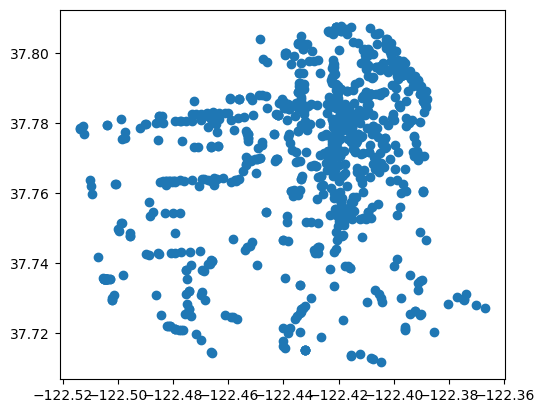

In [42]:
#plot blue zone points
bzs.plot()

In [65]:
#IMPORTING PARKING METER POINT DATA FROM SFTMA GIS SERVER

# Fetch data from the URL
url = "https://services.sfmta.com/arcgis/rest/services/DataSF/master/FeatureServer/19/query"
params = {
    'where': '1=1',  # Fetch all features
    'f': 'geojson'  # Request data in GeoJSON format
}
response = requests.get(url, params=params)

# Convert GeoJSON to GeoDataFrame
mets = gpd.read_file(response.text)

# print geodataframe
print(mets.head())

  STREET_NAME                     geometry
0   TEHAMA ST  POINT (-122.39791 37.78622)
1     02ND ST  POINT (-122.39132 37.78112)
2     02ND ST  POINT (-122.38987 37.78020)
3     02ND ST  POINT (-122.39252 37.77854)
4     03RD ST  POINT (-122.39643 37.78191)


<Axes: >

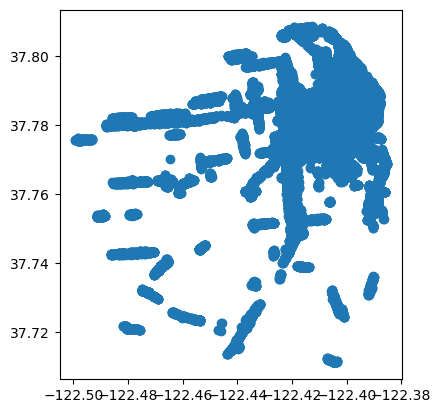

In [66]:
#plot meter points
mets.plot()

In [84]:
#IMPORT LIBRARY POINT DATA FROM OPEN DATA SF

# Send a GET request to the URL to fetch the data
url = "https://data.sfgov.org/resource/fhhu-wqa7.json"
response = requests.get(url)

if response.status_code == 200:
    # Parse the response JSON into a Python data structure
    data = response.json()

    # Convert the JSON data to a DataFrame
    df = pd.DataFrame(data)

    # Convert latitude and longitude columns to Point geometries
    geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]

    # Create a GeoDataFrame from the DataFrame and geometry
    libs = gpd.GeoDataFrame(df, geometry=geometry)

# Print the first few rows of the GeoDataFrame
print(libs.head())

  facility_id                             common_name                      address           city zip_code owned_leased dept_id             department_name            longitude            latitude supervisor_district                                       city_tenants block_lot gross_sq_ft                     geometry
0      3260.0                          750 Brannan St               750 Brannan St  San Francisco    94103        Lease       9                    Non-City  -122.40243990799996   37.77386904000008                   6                                     Public Library       NaN         NaN  POINT (-122.40244 37.77387)
1       127.0  Anna E. Waden Branch Library (Bayview)                 5075 03rd St  San Francisco    94124          Own      48              Public Library  -122.39108620099995  37.732484671000066                  10                                                NaN  5339006A        9527  POINT (-122.39109 37.73248)
2       128.0                     Anza Bran

<Axes: >

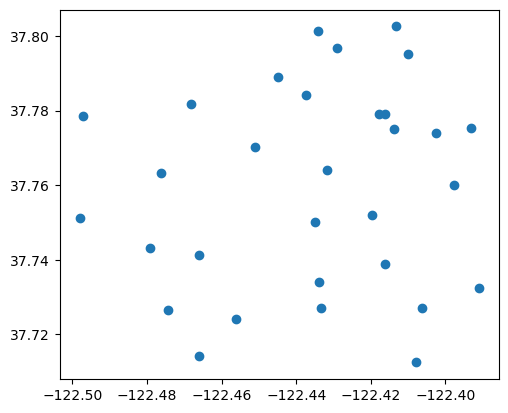

In [83]:
#plot meter points
libs.plot()

In [110]:
#IMPORT SCHOOL POINT DATA FROM OPEN DATA SF

try:
    # Send a GET request to the URL to fetch the data
    url = "https://data.sfgov.org/resource/tpp3-epx2.json"
    response = requests.get(url)

    if response.status_code == 200:
        # Parse the response JSON into a Python data structure
        data = response.json()

        # Convert the JSON data to a DataFrame
        df = pd.DataFrame(data)

        # Extract latitude and longitude from the 'location_1' column
        df['latitude'] = df['location_1'].apply(lambda x: x['latitude'])
        df['longitude'] = df['location_1'].apply(lambda x: x['longitude'])

        # Create Point geometries using latitude and longitude
        geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]

        # Create a GeoDataFrame from the DataFrame and the Point geometries
        scls = gpd.GeoDataFrame(df, geometry=geometry)

        # Print the first few rows of the GeoDataFrame
        print(scls.head())
    else:
        print("Error:", response.status_code)
        print("Response content:")
        print(response.text)  # Print response content as string

except Exception as e:
    print("An error occurred:", e)

                                         campus_name ccsf_entity lower_grade upper_grade grade_range               category map_label lower_age upper_age general_type                              campus_address supervisor_district county_fips    county_name                                         location_1 :@computed_region_fyvs_ahh9 :@computed_region_bh8s_q3mv :@computed_region_yftq_j783 :@computed_region_p5aj_wyqh :@computed_region_rxqg_mtj9        cds_code   latitude    longitude                     geometry
0                 Milk, Harvey Milk Childrens Center       SFUSD          -2          -1          PK               USD PreK    CDC095         3         4          CDC        841 ELLIS ST, SAN FRANCISCO CA 94117                   6       06075  SAN FRANCISCO  {'latitude': '37.783802', 'longitude': '-122.4...                          36                       28858                           7                           9                           9             NaN  37.783802  -122.

<Axes: >

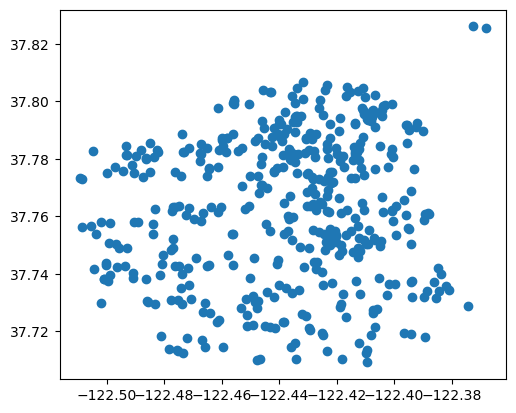

In [111]:
#plot school points
scls.plot()

In [112]:
#IMPORT HEALTHCARE POINT DATA FROM OPEN DATA SF

try:
    # Send a GET request to the URL to fetch the data
    url = "https://data.sfgov.org/resource/jhsu-2pka.json"
    response = requests.get(url)

    if response.status_code == 200:
        # Parse the response JSON into a Python data structure
        data = response.json()

        # Convert the JSON data to a DataFrame
        df = pd.DataFrame(data)

        # Extract latitude and longitude from the 'location_1' column
        df['latitude'] = df['location'].apply(lambda x: x['latitude'])
        df['longitude'] = df['location'].apply(lambda x: x['longitude'])

        # Create Point geometries using latitude and longitude
        geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]

        # Create a GeoDataFrame from the DataFrame and the Point geometries
        hlth = gpd.GeoDataFrame(df, geometry=geometry)

        # Print the first few rows of the GeoDataFrame
        print(hlth.head())
    else:
        print("Error:", response.status_code)
        print("Response content:")
        print(response.text)  # Print response content as string

except Exception as e:
    print("An error occurred:", e)

  uid   oshpd_id                                      facility_name                facility_type        services                                           location                                              point :@computed_region_jwn9_ihcz :@computed_region_6qbp_sg9q :@computed_region_qgnn_b9vv :@computed_region_26cr_cadq :@computed_region_ajp5_b2md     latitude      longitude                     geometry
0   3  106380929          California Pacific Med Ctr-pacific Campus  General Acute Care Hospital        Hospital  {'latitude': '37.79142444', 'longitude': '-122...  {'type': 'Point', 'coordinates': [-122.4310375...                         102                         102                           4                           6                          30  37.79142444  -122.43103755  POINT (-122.43104 37.79142)
1  39  306384014                      On Lok Senior Health Services             Community Clinic   Senior Health  {'latitude': '37.79846727', 'longitude': '-122...  {'type': 'P

<Axes: >

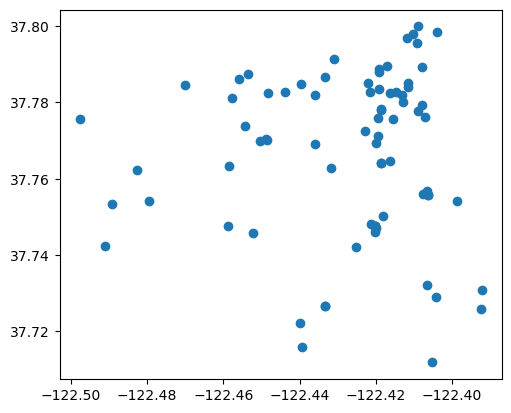

In [113]:
#plot school points
hlth.plot()

In [10]:
import osmnx as ox
import h3
import folium

# Download the boundary of San Francisco from OpenStreetMap
sf_boundary = ox.geocode_to_gdf('San Francisco, California, USA')

sf_boundary

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((-123.17382 37.77573, -123.1737...",37.929811,37.640314,-122.281479,-123.173825,312148942,relation,111968,37.779259,-122.419329,boundary,administrative,12,0.725131,city,San Francisco,"San Francisco, California, United States"


In [15]:
import osmnx as ox
import folium

# Download the census tracts for San Francisco from OpenStreetMap
sf_census_tracts = ox.geocode_to_gdf('San Francisco, California, USA')

# Create a map of San Francisco
m = folium.Map(location=[37.7749, -122.4194], zoom_start=10)

# Plot census tracts of San Francisco
folium.GeoJson(sf_census_tracts).add_to(m)

# Save the map
m.save('san_francisco_census_tracts.html')

m

In [17]:
import osmnx as ox
import folium

# Download the boundary of San Francisco from OpenStreetMap
sf_boundary = ox.geocode_to_gdf('San Francisco, California, USA')

# Create a map of San Francisco
m = folium.Map(location=[37.7749, -122.4194], zoom_start=10)

# Plot boundary of San Francisco
folium.GeoJson(sf_boundary).add_to(m)

# Save the map
m.save('san_francisco_boundary.html')